In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [67]:
df = pd.read_csv('student-por.csv')

In [68]:
pd.set_option('display.max_columns', None)

In [69]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [70]:
df.shape

(649, 33)

In [5]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex - student's sex (binary: 'F' - female or 'M' - male)

age - student's age (numeric: from 15 to 22)

address - student's home address type (binary: 'U' - urban or 'R' - rural)

famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian - student's guardian (nominal: 'mother', 'father' or 'other')

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)



These grades are related with the course subject, Math or Portuguese:

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)

In [6]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [7]:
print('the number of duplicate points in the dataset:', df.duplicated().sum())

the number of duplicate points in the dataset: 0


In [8]:
print('the number of missing points in the dataset:', df.isna().sum().sum())

the number of missing points in the dataset: 0


In [9]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


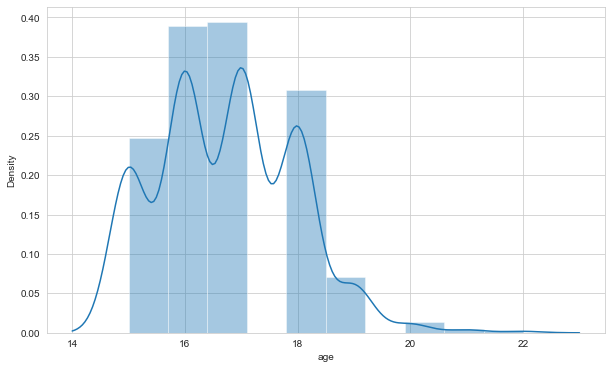

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,6))
sns.distplot(df['age'],bins=10)
plt.show()

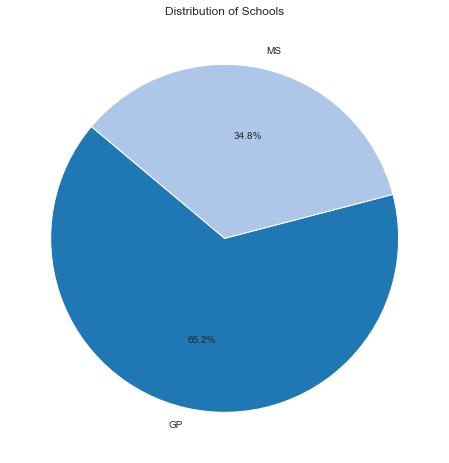

In [11]:
school_counts = df['school'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(school_counts, labels=school_counts.index,
        autopct='%1.1f%%', startangle=140,
        colors=plt.cm.tab20.colors)
plt.title("Distribution of Schools")
plt.show()

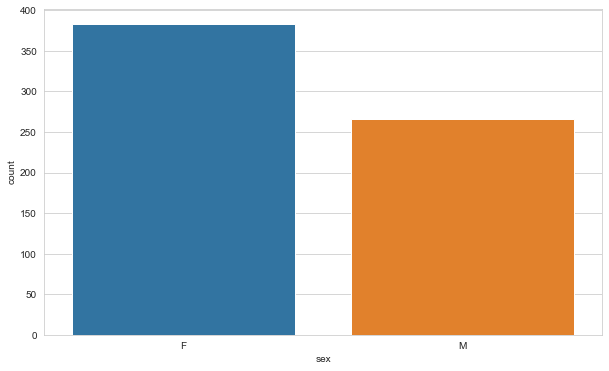

In [12]:
plt.figure(figsize=(10,6))
chart = sns.countplot(df['sex'])
plt.show()

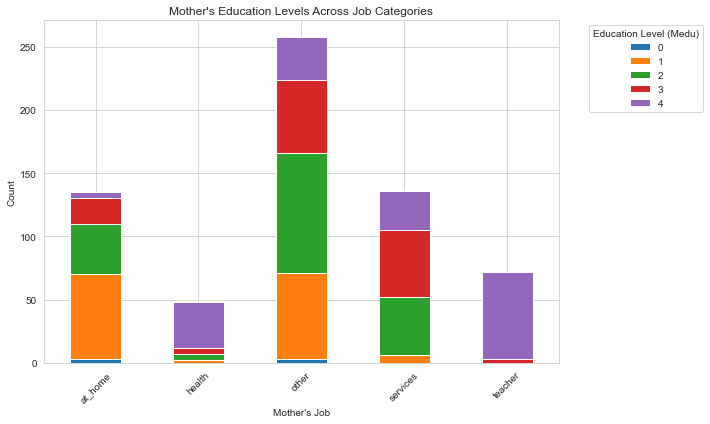

In [13]:
grouped_data = df.groupby(['Mjob', 'Medu']).size().unstack()
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Mother's Education Levels Across Job Categories")
plt.xlabel("Mother's Job")
plt.ylabel("Count")
plt.legend(title="Education Level (Medu)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

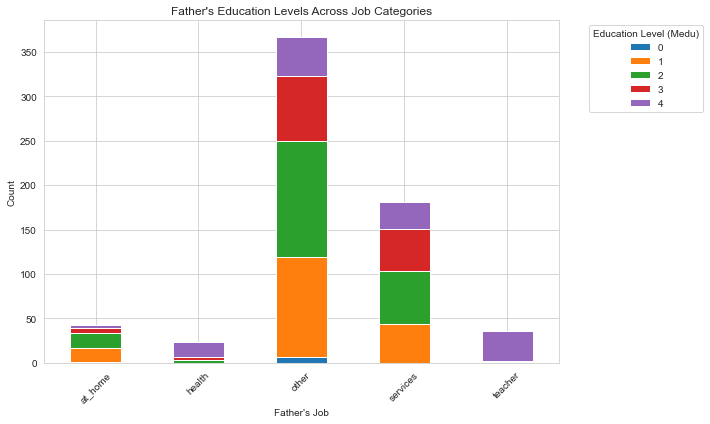

In [14]:
grouped_data = df.groupby(['Fjob', 'Fedu']).size().unstack()
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Father's Education Levels Across Job Categories")
plt.xlabel("Father's Job")
plt.ylabel("Count")
plt.legend(title="Education Level (Medu)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

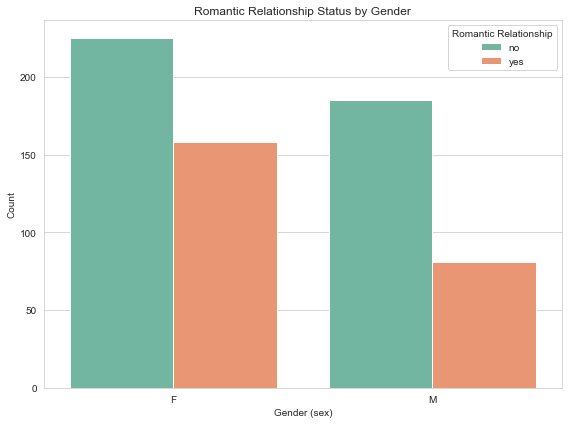

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sex', hue='romantic', palette='Set2')
plt.title("Romantic Relationship Status by Gender")
plt.xlabel("Gender (sex)")
plt.ylabel("Count")
plt.legend(title="Romantic Relationship")
plt.tight_layout()
plt.show()

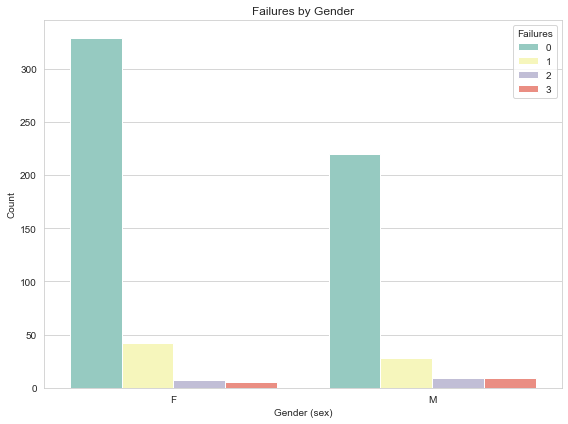

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sex', hue='failures', palette='Set3')
plt.title("Failures by Gender")
plt.xlabel("Gender (sex)")
plt.ylabel("Count")
plt.legend(title="Failures")
plt.tight_layout()
plt.show()

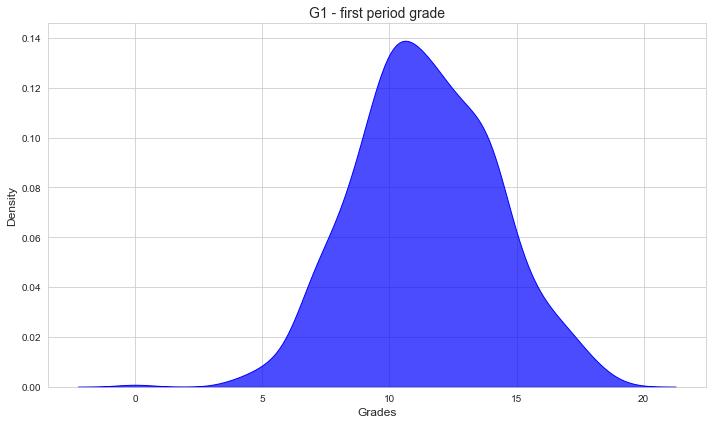

In [18]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['G1'], shade=True, color='blue', alpha=0.7)
plt.title('G1 - first period grade', fontsize=14)
plt.xlabel('Grades', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.tight_layout()
plt.show()

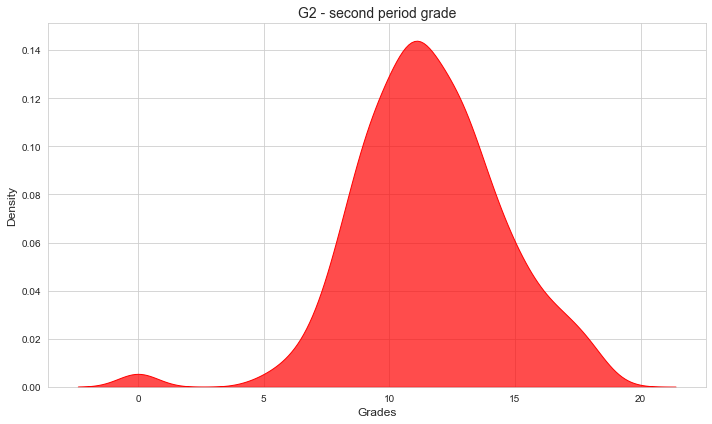

In [19]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['G2'], shade=True, color='red', alpha=0.7)
plt.title('G2 - second period grade', fontsize=14)
plt.xlabel('Grades', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.tight_layout()
plt.show()

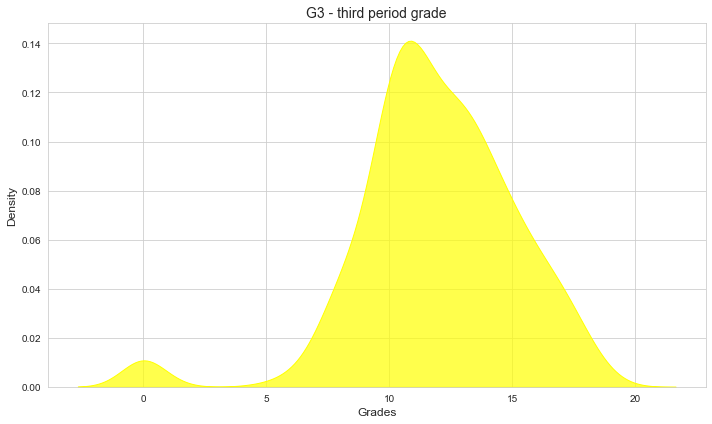

In [20]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['G3'], shade=True, color='yellow', alpha=0.7)
plt.title('G3 - third period grade', fontsize=14)
plt.xlabel('Grades', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.tight_layout()
plt.show()

In [22]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [23]:
df['avg_grades'] = df[['G1', 'G2', 'G3']].mean(axis=1)

In [24]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,avg_grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,7.333333
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,10.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,12.333333
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,14.000000
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,12.333333


In [25]:
df['avg_grades'].describe()

count    649.000000
mean      11.625064
std        2.833360
min        1.333333
25%       10.000000
50%       11.666667
75%       13.333333
max       18.666667
Name: avg_grades, dtype: float64

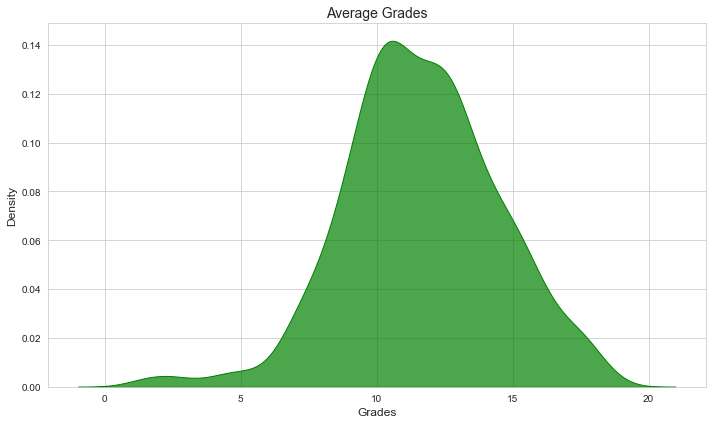

In [26]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['avg_grades'], shade=True, color='green', alpha=0.7)
plt.title('Average Grades', fontsize=14)
plt.xlabel('Grades', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.tight_layout()
plt.show()

In [27]:
df['guardian'].value_counts()

mother    455
father    153
other      41
Name: guardian, dtype: int64

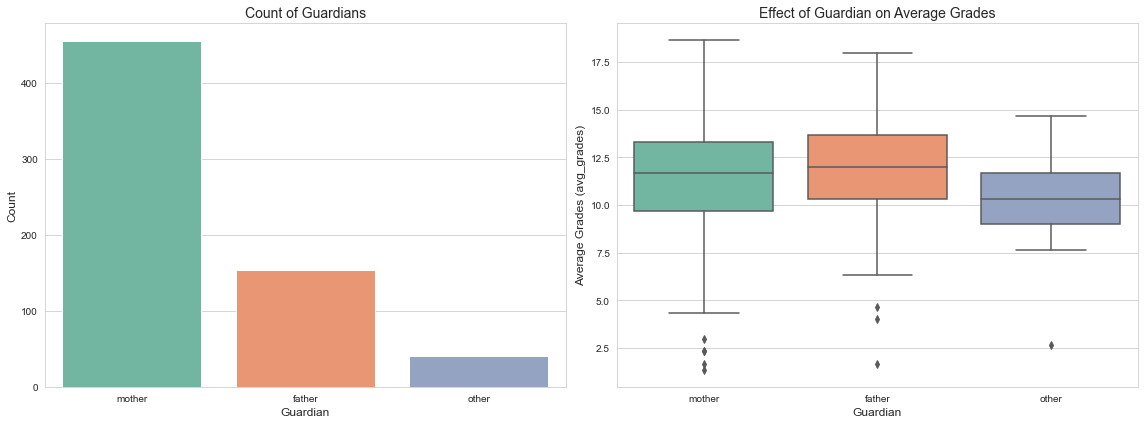

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x='guardian', data=df, palette='Set2', ax=axes[0])
axes[0].set_title('Count of Guardians', fontsize=14)
axes[0].set_xlabel('Guardian', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

sns.boxplot(x='guardian', y='avg_grades', data=df, palette='Set2', ax=axes[1])
axes[1].set_title('Effect of Guardian on Average Grades', fontsize=14)
axes[1].set_xlabel('Guardian', fontsize=12)
axes[1].set_ylabel('Average Grades (avg_grades)', fontsize=12)
plt.tight_layout()
plt.show()

In [29]:
df['failures'].value_counts()

0    549
1     70
2     16
3     14
Name: failures, dtype: int64

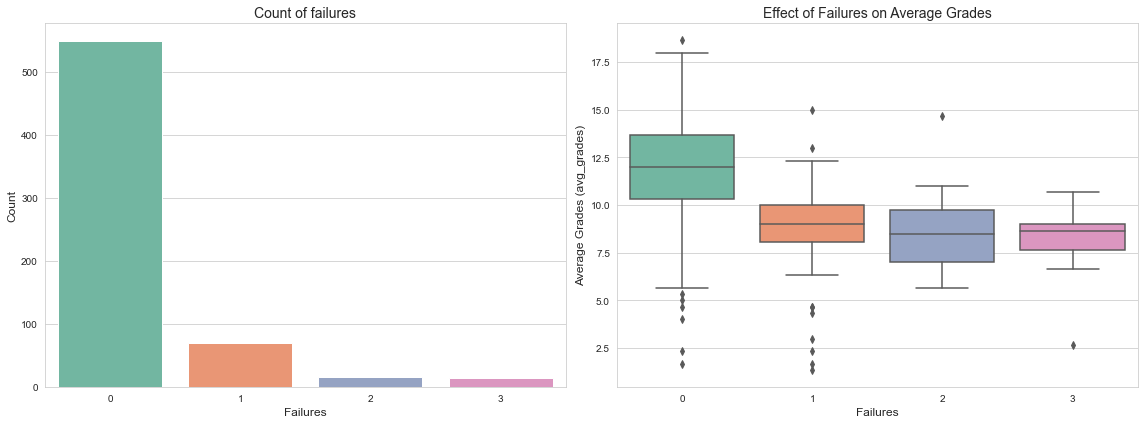

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x='failures', data=df, palette='Set2', ax=axes[0])
axes[0].set_title('Count of failures', fontsize=14)
axes[0].set_xlabel('Failures', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

sns.boxplot(x='failures', y='avg_grades', data=df, palette='Set2', ax=axes[1])
axes[1].set_title('Effect of Failures on Average Grades', fontsize=14)
axes[1].set_xlabel('Failures', fontsize=12)
axes[1].set_ylabel('Average Grades (avg_grades)', fontsize=12)
plt.tight_layout()
plt.show()

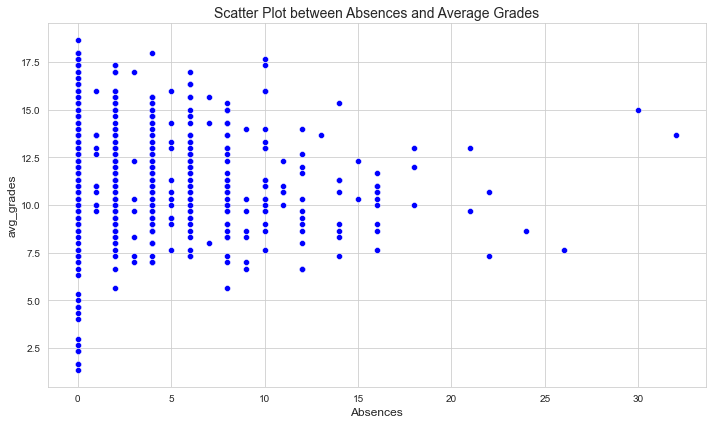

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='absences', y='avg_grades', data=df, color='blue')
plt.title('Scatter Plot between Absences and Average Grades', fontsize=14)
plt.xlabel('Absences', fontsize=12)
plt.ylabel('avg_grades', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

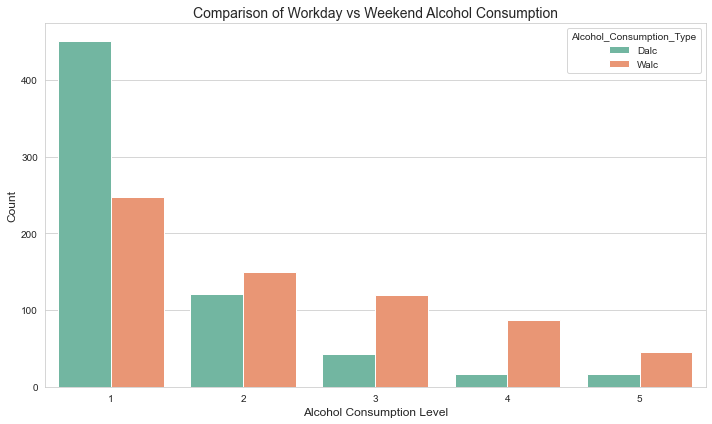

In [32]:
df_melted = df[['Dalc', 'Walc']].melt(var_name='Alcohol_Consumption_Type', value_name='Level')
plt.figure(figsize=(10, 6))
sns.countplot(x='Level', hue='Alcohol_Consumption_Type', data=df_melted, palette='Set2')
plt.title('Comparison of Workday vs Weekend Alcohol Consumption', fontsize=14)
plt.xlabel('Alcohol Consumption Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

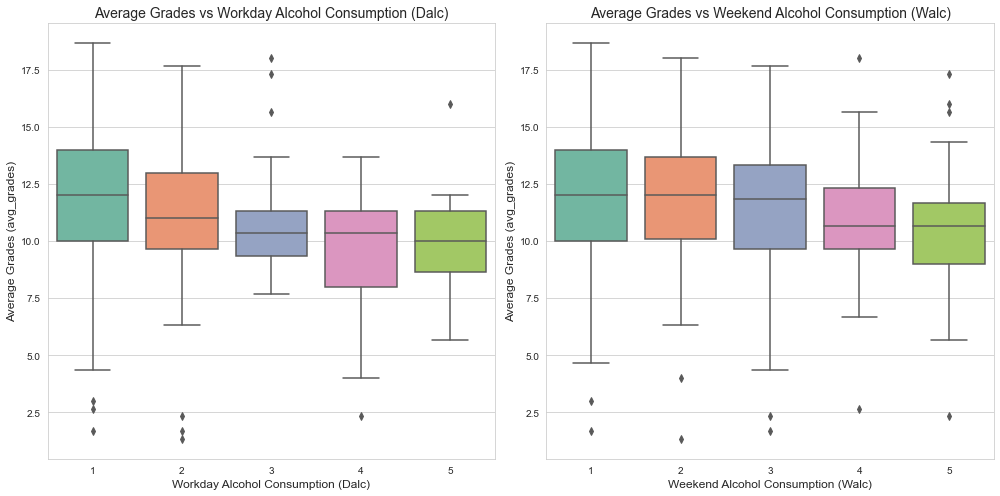

In [33]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(x='Dalc', y='avg_grades', data=df, palette='Set2')
plt.title('Average Grades vs Workday Alcohol Consumption (Dalc)', fontsize=14)
plt.xlabel('Workday Alcohol Consumption (Dalc)', fontsize=12)
plt.ylabel('Average Grades (avg_grades)', fontsize=12)
plt.subplot(1, 2, 2)
sns.boxplot(x='Walc', y='avg_grades', data=df, palette='Set2')
plt.title('Average Grades vs Weekend Alcohol Consumption (Walc)', fontsize=14)
plt.xlabel('Weekend Alcohol Consumption (Walc)', fontsize=12)
plt.ylabel('Average Grades (avg_grades)', fontsize=12)
plt.tight_layout()
plt.show()

In [34]:
df.drop(['Medu', 'Fedu', 'G1', 'G2', 'G3'], axis=1, inplace=True)

In [35]:
df.head()

,school,sex,age,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,avg_grades
0,GP,F,18,U,GT3,A,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,7.333333
1,GP,F,17,U,GT3,T,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,10.333333
2,GP,F,15,U,LE3,T,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12.333333
3,GP,F,15,U,GT3,T,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14.000000
4,GP,F,16,U,GT3,T,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,12.333333


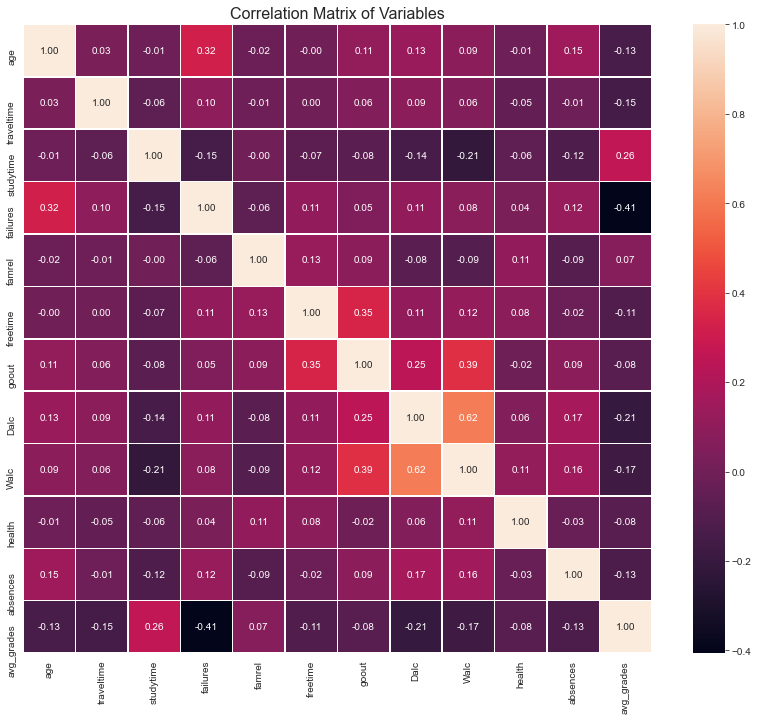

In [36]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5, square=True)
plt.title('Correlation Matrix of Variables', fontsize=16)
plt.tight_layout()
plt.show()

In [37]:
df.dtypes

school         object
sex            object
age             int64
address        object
famsize        object
Pstatus        object
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures        int64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel          int64
freetime        int64
goout           int64
Dalc            int64
Walc            int64
health          int64
absences        int64
avg_grades    float64
dtype: object

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [40]:
df.head()

,school,sex,age,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,avg_grades
0,0,0,18,1,0,0,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,7.333333
1,0,0,17,1,0,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,10.333333
2,0,0,15,1,1,1,0,2,2,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12.333333
3,0,0,15,1,0,1,1,3,1,1,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14.000000
4,0,0,16,1,0,1,2,2,1,0,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,12.333333


In [41]:
features = df.drop(columns = 'avg_grades', axis = 1)
target = df['avg_grades']

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.1)

## Quantile Regression

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import QuantileRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, median_absolute_error, r2_score

In [47]:
quantile_values = np.linspace(0.1, 0.9, 9)  # Testing quantiles from 0.1 to 0.9 in steps of 0.1
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

param_grid = {'quantile': quantile_values}

quantile_regressor = QuantileRegressor(alpha=0)
grid_search = GridSearchCV(estimator=quantile_regressor, param_grid=param_grid, scoring=mae_scorer, cv=5)
grid_search.fit(x_train, y_train)
best_quantile = grid_search.best_params_['quantile']
best_score = -grid_search.best_score_ 
print(f"Best Quantile: {best_quantile:.2f}")
print(f"Best Mean Absolute Error (MAE): {best_score:.4f}")

Best Quantile: 0.40
Best Mean Absolute Error (MAE): 1.8880


In [48]:
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(x_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_medae = median_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Test Set MAE: {test_mae:.4f}")
print(f"Test Set MedAE: {test_medae:.4f}")
print(f"Test Set R-squared: {test_r2:.4f}")

Test Set MAE: 1.9775
Test Set MedAE: 1.5434
Test Set R-squared: 0.1688


In [49]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test
})

results_df.head(20)

,Actual,Predicted
37,13.000000,11.722041
510,16.333333,11.842592
503,14.000000,10.981757
137,11.666667,10.124382
320,13.000000,10.013998
201,14.333333,12.188256
181,17.333333,12.192084
29,11.666667,10.843574
270,14.666667,11.768162
330,13.000000,11.934189


## Ridge Regression

In [51]:
from sklearn.linear_model import Ridge

In [52]:
alpha_values = np.logspace(-3, 3, 7) # Testing alphas from 0.001 to 1000 on a log scale

mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

param_grid = {'alpha': alpha_values}

ridge_regressor = Ridge()
grid_search = GridSearchCV(estimator=ridge_regressor, param_grid=param_grid, scoring=mae_scorer, cv=5)
grid_search.fit(x_train, y_train)
best_alpha = grid_search.best_params_['alpha']
best_score = -grid_search.best_score_
print(f"Best Alpha: {best_alpha:.3f}")
print(f"Best Mean Absolute Error (MAE): {best_score:.4f}")

Best Alpha: 10.000
Best Mean Absolute Error (MAE): 1.7995


In [53]:
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(x_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_medae = median_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Test Set MAE: {test_mae:.4f}")
print(f"Test Set MedAE: {test_medae:.4f}")
print(f"Test Set R-squared: {test_r2:.4f}")

Test Set MAE: 1.8742
Test Set MedAE: 1.4568
Test Set R-squared: 0.2259


In [54]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test
})

results_df.head(20)

,Actual,Predicted
37,13.000000,12.531594
510,16.333333,12.259045
503,14.000000,11.663871
137,11.666667,10.437824
320,13.000000,10.712940
201,14.333333,12.619367
181,17.333333,13.023209
29,11.666667,10.984148
270,14.666667,12.096824
330,13.000000,12.711555


## Lasso Regression

In [55]:
from sklearn.linear_model import Lasso

In [56]:
alpha_values = np.logspace(-3, 3, 7) # Testing alphas from 0.001 to 1000 on a log scale

mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

param_grid = {'alpha': alpha_values}

lasso_regressor = Lasso()
grid_search = GridSearchCV(estimator=lasso_regressor, param_grid=param_grid, scoring=mae_scorer, cv=5)
grid_search.fit(x_train, y_train)
best_alpha = grid_search.best_params_['alpha']
best_score = -grid_search.best_score_

print(f"Best Alpha: {best_alpha:.4f}")
print(f"Best Mean Absolute Error (MAE): {best_score:.4f}")

Best Alpha: 0.0100
Best Mean Absolute Error (MAE): 1.8051


In [57]:
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(x_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_medae = median_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Test Set MAE: {test_mae:.4f}")
print(f"Test Set MedAE: {test_medae:.4f}")
print(f"Test Set R-squared: {test_r2:.4f}")

Test Set MAE: 1.8603
Test Set MedAE: 1.4072
Test Set R-squared: 0.2326


In [58]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test
})

results_df.head(20)

,Actual,Predicted
37,13.000000,12.649890
510,16.333333,12.230628
503,14.000000,11.476878
137,11.666667,10.568040
320,13.000000,10.623911
201,14.333333,12.625075
181,17.333333,13.083625
29,11.666667,11.147727
270,14.666667,12.233932
330,13.000000,12.775275


## Bayesian Ridge Regression

In [59]:
from sklearn.linear_model import BayesianRidge

In [60]:
param_grid = {
    'alpha_1': [1e-6, 1e-4, 1e-2, 1, 10],  #  Testing values for alpha 1
    'alpha_2': [1e-6, 1e-4, 1e-2, 1, 10],  #  Testing values for alpha 2
    'lambda_1': [1e-6, 1e-4, 1e-2, 1, 10], #  Testing values for lambda 1
    'lambda_2': [1e-6, 1e-4, 1e-2, 1, 10], #  Testing values for lambda 2
}

mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

bayesian_regressor = BayesianRidge()
grid_search = GridSearchCV(estimator=bayesian_regressor, param_grid=param_grid, scoring=mae_scorer, cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_score = -grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Mean Absolute Error (MAE): {best_score:.4f}")

Best Parameters: {'alpha_1': 1e-06, 'alpha_2': 10, 'lambda_1': 10, 'lambda_2': 1}
Best Mean Absolute Error (MAE): 1.7935


In [61]:
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(x_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_medae = median_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Test Set MAE: {test_mae:.4f}")
print(f"Test Set MedAE: {test_medae:.4f}")
print(f"Test Set R-squared: {test_r2:.4f}")

Test Set MAE: 1.8825
Test Set MedAE: 1.3147
Test Set R-squared: 0.2213


In [62]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test
})

results_df.head(20)

,Actual,Predicted
37,13.000000,12.496713
510,16.333333,12.254614
503,14.000000,12.058977
137,11.666667,10.428088
320,13.000000,10.874897
201,14.333333,12.575309
181,17.333333,12.921954
29,11.666667,11.051373
270,14.666667,12.113068
330,13.000000,12.526807


## Random Forest Regressor

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
n_estimators_values = [10, 50, 100, 200, 500]  # Testing values for the number of estimators

mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

param_grid = {'n_estimators': n_estimators_values}

random_forest_regressor = RandomForestRegressor()
grid_search = GridSearchCV(estimator=random_forest_regressor, param_grid=param_grid, scoring=mae_scorer, cv=5)
grid_search.fit(x_train, y_train)
best_n_estimators = grid_search.best_params_['n_estimators']
best_score = -grid_search.best_score_

print(f"Best n_estimators: {best_n_estimators}")
print(f"Best Mean Absolute Error (MAE): {best_score:.4f}")

Best n_estimators: 500
Best Mean Absolute Error (MAE): 1.7606


In [65]:
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(x_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_medae = median_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Test Set MAE: {test_mae:.4f}")
print(f"Test Set MedAE: {test_medae:.4f}")
print(f"Test Set R-squared: {test_r2:.4f}")

Test Set MAE: 1.9670
Test Set MedAE: 1.8900
Test Set R-squared: 0.1851


In [66]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test
})

results_df.head(20)

,Actual,Predicted
37,13.000000,13.671333
510,16.333333,12.371333
503,14.000000,11.990667
137,11.666667,9.468000
320,13.000000,8.568667
201,14.333333,12.865333
181,17.333333,13.208000
29,11.666667,12.287333
270,14.666667,12.929333
330,13.000000,12.766667
